In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating a Random Dataset
The valus is between 0 and 100 and the classification is based in valus under 15.
It's interessant to make all values of the array under 15 to make the algorithm understand that some columns have more weight than others.

In [63]:
min_value_change_state = 20
columns = [ "bladder", "hygiene", "energy", "hunger", "health"]

dataset = []
for i in range(2500):
  line = np.random.randint(0, 100, size=len(columns)).tolist()
  smaller_index = len(columns)
  smaller_number = 100
  if i < 950 and i % 2 == 0:
    line = np.random.randint(0, 30, size=len(columns)).tolist()
  for j in range(len(line)):
    if line[j] < smaller_number:
      smaller_index = j
      smaller_number = line[j]
  decision = columns[smaller_index] if smaller_number <= min_value_change_state else "nothing"
  line.append(decision)
  dataset.append(line)
dataset = pd.DataFrame(data=dataset, columns=columns + ["decision"])
dataset.head()

,bladder,hygiene,energy,hunger,health,decision
0,16,6,19,12,6,hygiene
1,44,40,63,62,47,nothing
2,1,18,20,5,3,bladder
3,3,93,65,45,71,bladder
4,19,23,23,13,0,health


In [64]:
dataset.loc[(dataset['bladder'] <= 15) & (dataset['hygiene'] <= 15) & (dataset['energy'] <= 15) & (dataset['hunger'] <= 15) & (dataset['health'] <= 15)]

,bladder,hygiene,energy,hunger,health,decision
52,9,5,6,9,9,hygiene
180,2,14,1,15,14,energy
188,15,7,7,6,5,health
224,4,12,6,6,12,bladder
354,0,13,8,7,2,bladder
374,3,10,5,4,9,bladder
456,1,12,5,15,15,bladder
544,6,0,13,0,9,hygiene
572,6,10,0,13,7,energy
590,2,10,7,4,3,bladder


In [65]:
dataset.tail()

,bladder,hygiene,energy,hunger,health,decision
2495,44,8,31,24,95,hygiene
2496,80,83,71,23,54,nothing
2497,31,52,75,53,76,nothing
2498,59,4,18,20,6,hygiene
2499,47,99,44,33,51,nothing


# Splitting dataset in train and test

In [66]:
from sklearn.model_selection import train_test_split

dataset_no_class = dataset.drop('decision', axis=1)
only_class = dataset['decision']
x_train, x_test, y_train, y_test = train_test_split(dataset_no_class, only_class, test_size=0.33)
x_train.head()

,bladder,hygiene,energy,hunger,health
2409,96,25,99,21,77
881,3,64,18,27,57
1378,35,40,69,26,94
1446,46,99,31,48,92
1272,65,48,10,66,85


In [67]:
x_train.loc[(x_train['bladder'] <= 15) & (x_train['hygiene'] <= 15) & (x_train['energy'] <= 15) & (x_train['hunger'] <= 15) & (x_train['health'] <= 15)]

,bladder,hygiene,energy,hunger,health
572,6,10,0,13,7
920,4,0,6,13,8
848,10,0,11,2,12
180,2,14,1,15,14
354,0,13,8,7,2
794,0,5,14,15,14
678,10,15,10,15,3
590,2,10,7,4,3
544,6,0,13,0,9
854,1,0,6,6,3


In [68]:
len(y_train)

1675

# Creating the Decision Tree algorithm and training
Passing class_weights force the algorithm add weights to some classes.

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

clf = DecisionTreeClassifier(
    criterion='gini',
    class_weight={'bladder': 1, 'hygiene': 1, 'energy': 2, 'hunger': 3, 'health': 5},
    random_state=0)
clf.fit(x_train.values, y_train.values)

DecisionTreeClassifier(class_weight={'bladder': 1, 'energy': 2, 'health': 5,
                                     'hunger': 3, 'hygiene': 1},
                       random_state=0)

# Plotting the tree model graph

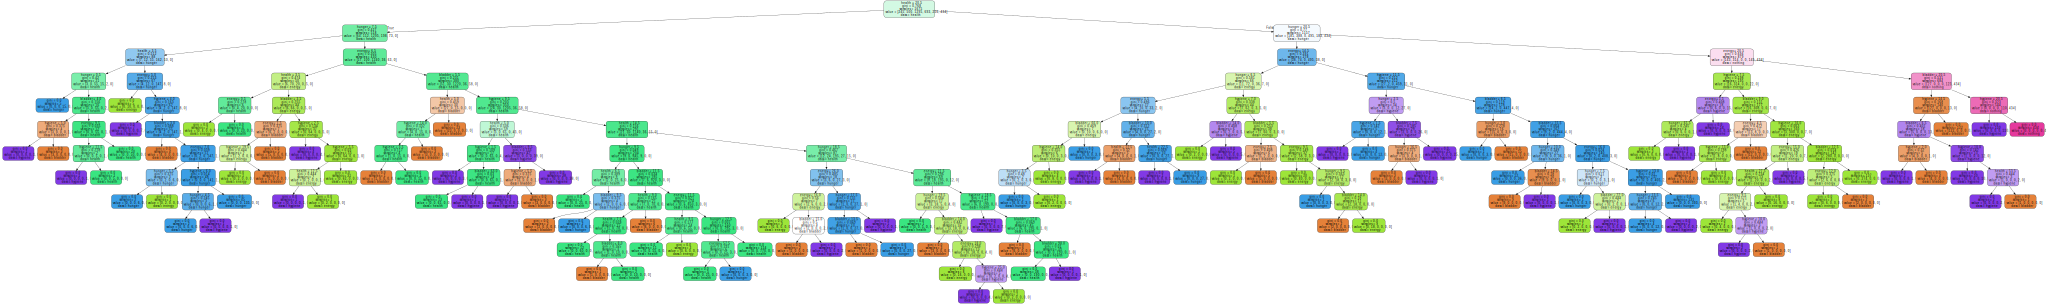

In [70]:
import graphviz


dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=columns,
    class_names=clf.classes_,
    filled=True, rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

# Accuracy of Decision Tree model

In [71]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(x_test.values)
print(classification_report(y_pred, y_test, target_names=dataset['decision'].unique()))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

     hygiene       0.90      0.92      0.91       132
     nothing       0.96      0.89      0.92       144
     bladder       0.92      0.96      0.94        95
      health       0.91      0.96      0.94       130
      hunger       0.92      0.89      0.91       109
      energy       1.00      1.00      1.00       215

    accuracy                           0.94       825
   macro avg       0.93      0.94      0.93       825
weighted avg       0.94      0.94      0.94       825

0.9418181818181818


# Exporting the model

In [72]:
import joblib

joblib.dump(clf, open('../static/models/decision_tree.joblib','wb'))

# Generating Confusion Matrix to better visualization of classes accuracies

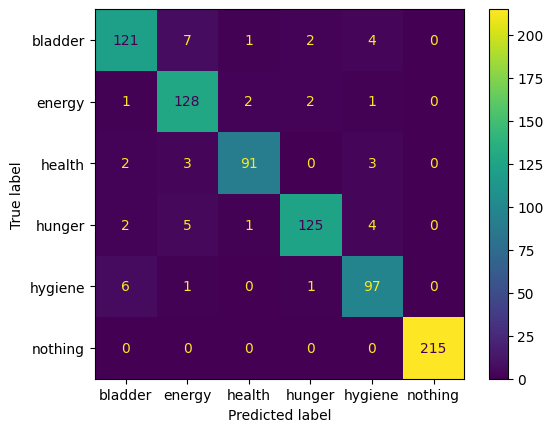

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Creating Random Forest algorithm and training

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    criterion='gini',
    class_weight={'bladder': 1, 'hygiene': 1, 'energy': 1.2, 'hunger': 1.5, 'health': 2},
    random_state=1,
)
rfc.fit(x_train.values, y_train.values);

# Plotting the tree model graph

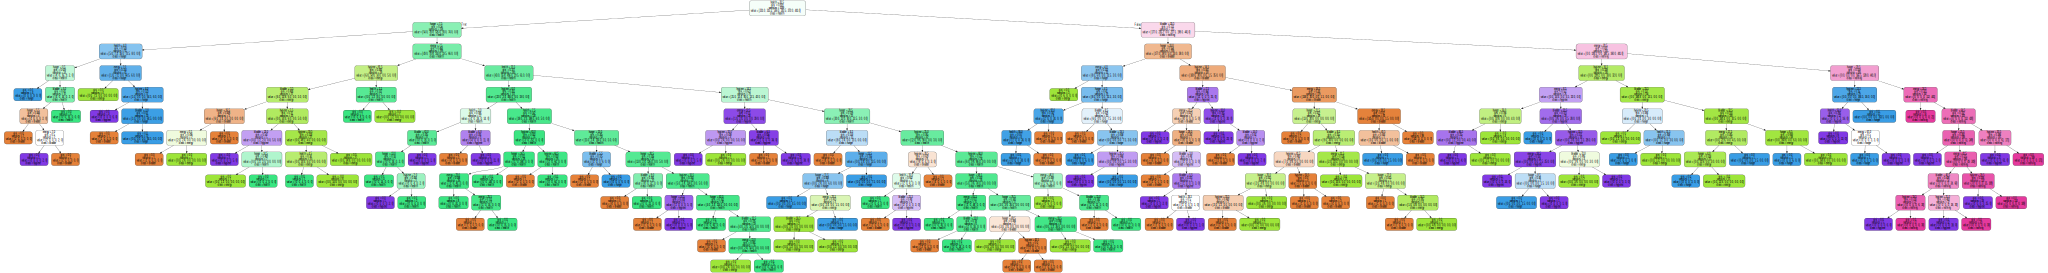

In [75]:
dot_data = export_graphviz(
    rfc.estimators_[0], out_file=None,
    feature_names=columns,
    class_names=rfc.classes_,
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

# Accuracy of Random Forest model

In [76]:
y_pred = rfc.predict(x_test.values)
print(classification_report(y_pred, y_test, target_names=dataset['decision'].unique()))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

     hygiene       0.99      0.94      0.96       142
     nothing       0.96      0.93      0.95       138
     bladder       0.95      0.96      0.95        98
      health       0.93      0.98      0.95       129
      hunger       0.95      0.97      0.96       103
      energy       1.00      1.00      1.00       215

    accuracy                           0.97       825
   macro avg       0.96      0.96      0.96       825
weighted avg       0.97      0.97      0.97       825

0.9672727272727273


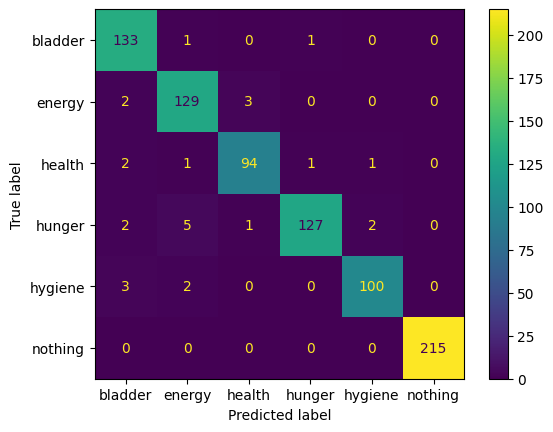

In [77]:
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [78]:
joblib.dump(rfc, open('../static/models/random_forest.joblib','wb'))